## ROC的概念

ROC曲线描述TPR与FPR之间的关系<br>
TPR指召回率即TP/TP+FN即预测是1且结果也是1的总数除以预测是1且结果也是1的总数+预测是0实际是1的总数

## TPR与FPR的关系

TPR增大时FPR也同步增大，TPR是好的，FPR是不好的数值

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
Y = digits.target.copy()
Y[digits.target==9] = 1
Y[digits.target!=9] = 0

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 666)
X_train.shape

(1347, 64)

In [36]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
decision_score = log_reg.decision_function(X_test)

## 绘制ROC曲线

In [38]:
from sklearn.metrics import roc_curve
fprs, tprs, threshold = roc_curve(Y_test, decision_score)

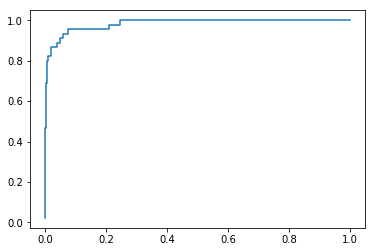

In [39]:
plt.plot(fprs, tprs)
plt.show()

## 自动计算面积

In [41]:
from sklearn.metrics import roc_auc_score
##面积越大模型越好
roc_auc_score(Y_test, decision_score)

0.98304526748971188